In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt
from uncertainties import *

savedir = "E01/"

In [3]:
all_data = loader.load_data( "../Plans20221024TheHugescan_20221024/**/" )
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

154

In [4]:
def compute_in_decades( thearray, func ):
    tot_len = len( thearray )
    cluster_len = int( tot_len / 10 )
    results = []
    for i in range( 10 ):
        results.append( func( thearray[ cluster_len * i : cluster_len * ( i + 1 ) ] ) )
    u = ufloat( func( thearray ), np.std( results ) )
    print( u )
    return u

In [5]:
for d in data:
    d['pj_over_1_minus_q_u'] = compute_in_decades( d['chunks'], lambda d: np.mean( d ) ) / d['side'] / d['side'] / ( 1 - d['defects_frac'] )
    d['pj_u'] = compute_in_decades( d['chunks'], lambda d: np.mean( d ) ) / d['side'] / d['side']

2848.59+/-0.26
2848.59+/-0.26
3292.51+/-0.08
3292.51+/-0.08
2273.5+/-0.7
2273.5+/-0.7
3108.2+/-0.8
3108.2+/-0.8
2989.80+/-0.18
2989.80+/-0.18
2819.75+/-0.21
2819.75+/-0.21
3100.67+/-0.09
3100.67+/-0.09
11240.89+/-0.34
11240.89+/-0.34
2922.47+/-0.08
2922.47+/-0.08
10519.1+/-2.5
10519.1+/-2.5
10955.5+/-0.8
10955.5+/-0.8
10280.9+/-1.6
10280.9+/-1.6
9769.34+/-0.14
9769.34+/-0.14
3290.84+/-0.16
3290.84+/-0.16
8954.8+/-2.4
8954.8+/-2.4
13156.19+/-0.31
13156.19+/-0.31
2791.20+/-0.10
2791.20+/-0.10
12434.9+/-0.6
12434.9+/-0.6
11974.82+/-0.24
11974.82+/-0.24
2592.44+/-0.15
2592.44+/-0.15
2726.85+/-0.07
2726.85+/-0.07
2554.28+/-0.07
2554.28+/-0.07
11310.5+/-0.5
11310.5+/-0.5
12410.8+/-0.5
12410.8+/-0.5
3110.80+/-0.06
3110.80+/-0.06
11699.9+/-0.6
11699.9+/-0.6
11199.4+/-1.2
11199.4+/-1.2
10437.07+/-0.19
10437.07+/-0.19
2405.45+/-0.13
2405.45+/-0.13
10929.1+/-0.6
10929.1+/-0.6
2167.98+/-0.34
2167.98+/-0.34
13168.79+/-0.27
13168.79+/-0.27
10245.9+/-3.1
10245.9+/-3.1
9690.58+/-0.31
9690.58+/-0.31
88

FileNotFoundError: [Errno 2] No such file or directory: 'E01/jamming_normalized_witherrors.pdf'

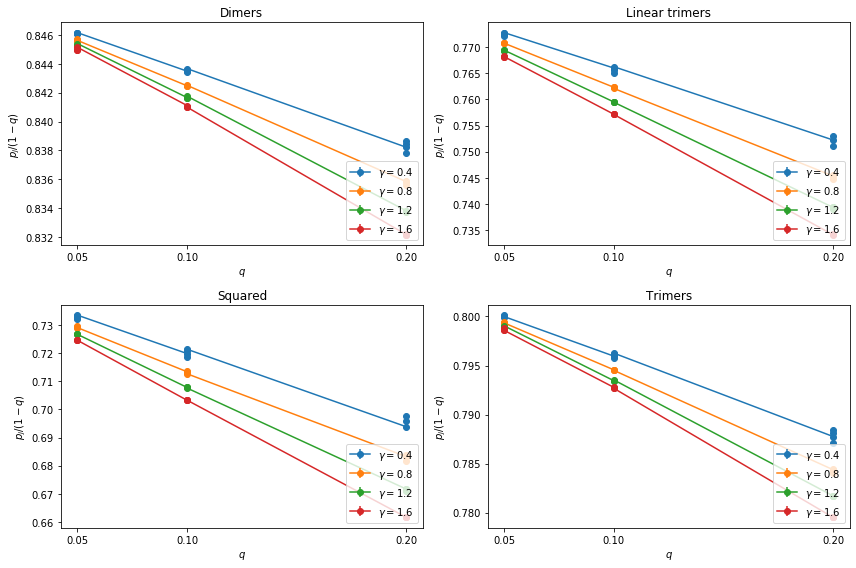

In [6]:
filtered_data = data

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_over_1_minus_q_u'],
    ],
    lambda it, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': 'o' }
    ],
    lambda it: (
        plt.title( fr"{it}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming_normalized_witherrors.pdf" )
plt.savefig( savedir + "jamming_normalized_witherrors.png" )

FileNotFoundError: [Errno 2] No such file or directory: 'E01/jamming_witherrors.pdf'

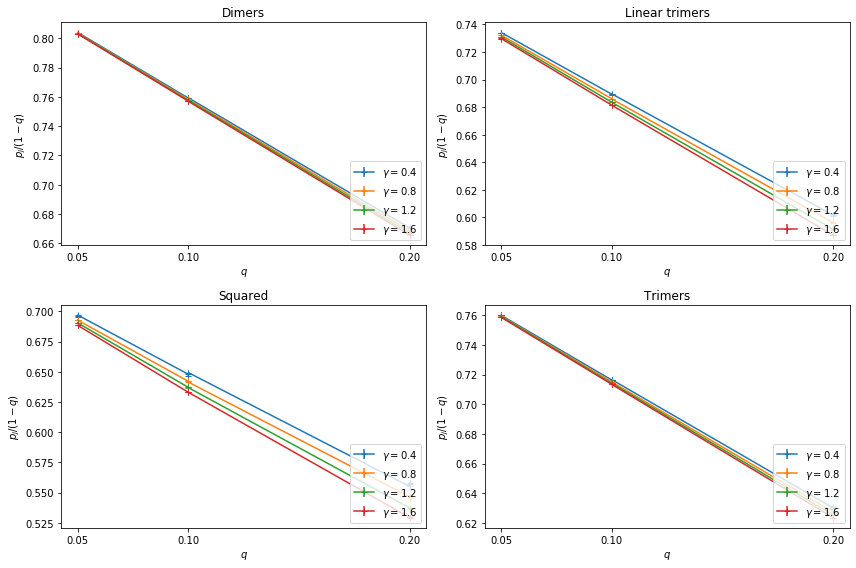

In [7]:
filtered_data = data

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_u'],
    ],
    lambda it, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': '+' }
    ],
    lambda it: (
        plt.title( fr"{it}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming_witherrors.pdf" )
plt.savefig( savedir + "jamming_witherrors.png" )